## Description 
Point cloud data is stored as a 2D matrix
each row has 3 values i.e. the x, y, z value for a point

Project has to be submitted to github in the private folder assigned to you
Readme file should have the numerical values as described in each task
Create a folder to store the images as described in the tasks.

Try to create commits and version for each task.

In [48]:
import matplotlib
import numpy as np
from scipy.spatial import KDTree
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [49]:
def show_cloud(points_plt, file_path):
    ax = plt.axes(projection='3d')
    ax.scatter(points_plt[:,0], points_plt[:,1], points_plt[:,2], s=0.01)
    plt.savefig(file_path, bbox_inches='tight')
    plt.show()

def show_scatter(x,y):
    plt.scatter(x, y)
    plt.show()

def get_ground_level(pcd):
    # Create histogram of z-coordinates
    z_coords = pcd[:, 2]
    hist, bin_edges = np.histogram(z_coords, bins=100)
    
    # Find the bin with the highest count (most common height)
    max_count_idx = np.argmax(hist)
    
    # Get the center of that bin as the ground level
    ground_level = (bin_edges[max_count_idx] + bin_edges[max_count_idx + 1]) / 2
    
    return ground_level

# Dataset 1

In [50]:
pcd = np.load("./data/dataset1.npy")
pcd.shape

(72067, 3)

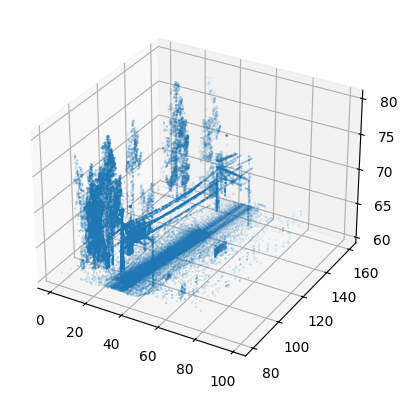

In [51]:
%matplotlib inline
show_cloud(pcd, "results/dataset_1_point_cloud.png")

Estimated ground level: 61.24968500000003


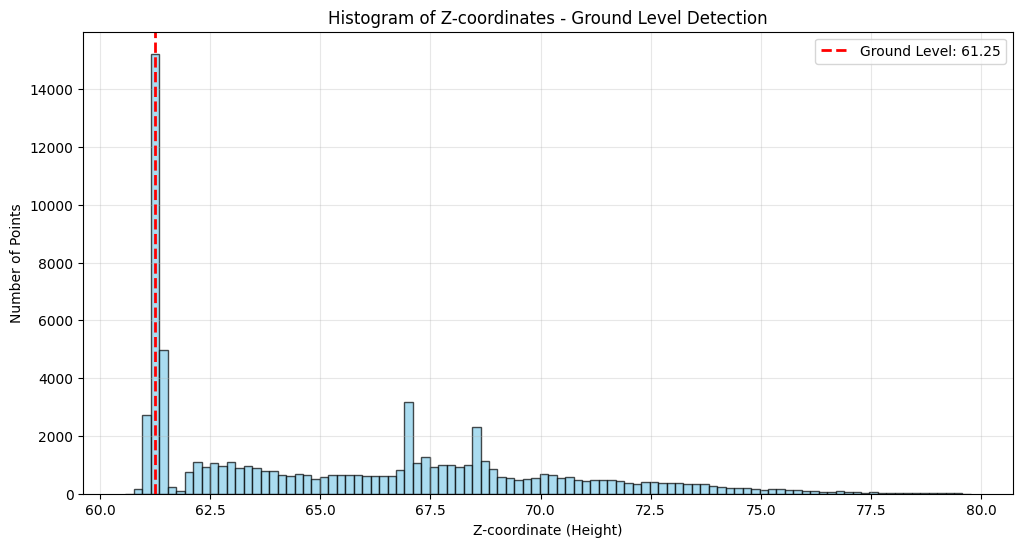

In [ ]:
def plot_histogram_ground_points(pcd):
    # Create histogram of z-coordinates
    z_coords = pcd[:, 2]
    hist, bin_edges = np.histogram(z_coords, bins=100)
    
    # Find the bin with the highest count (most common height)
    max_count_idx = np.argmax(hist)
    
    # Get the center of that bin as the ground level
    ground_level = (bin_edges[max_count_idx] + bin_edges[max_count_idx + 1]) / 2

    print(f"Estimated ground level: {ground_level}")

    z_coords = pcd[:, 2]
    plt.figure(figsize=(12, 6))
    plt.hist(z_coords, bins=100, alpha=0.7, color='skyblue', edgecolor='black')
    plt.axvline(x=ground_level, color='red', linestyle='--', linewidth=2, label=f'Ground Level: {ground_level:.2f}')
    plt.xlabel('Z-coordinate (Height)')
    plt.ylabel('Number of Points')
    plt.title('Histogram of Z-coordinates - Ground Level Detection')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig("results/dataset_1_histogram_ground.png", bbox_inches='tight')
    plt.show()

plot_histogram_ground_points(pcd)

In [53]:

'''
Task 1 (3)
find the best value for the ground level
One way to do it is useing a histogram 
np.histogram

update the function get_ground_level() with your changes

For both the datasets
Report the ground level in the readme file in your github project
Add the histogram plots to your project readme
'''
est_ground_level = get_ground_level(pcd)
print(est_ground_level)

pcd_above_ground = pcd[pcd[:,2] > est_ground_level] 

61.24968500000003


In [54]:
pcd_above_ground.shape

(62411, 3)

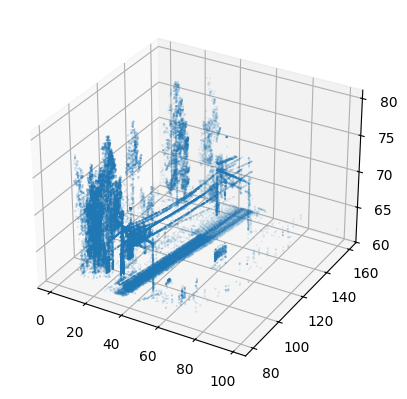

In [55]:
show_cloud(pcd_above_ground, "results/dataset_1_point_cloud_no_ground.png")

In [56]:
unoptimal_eps = 2
# find the elbow
clustering = DBSCAN(eps = unoptimal_eps, min_samples=100).fit(pcd_above_ground)

In [57]:
clusters = len(set(clustering.labels_)) - (1 if -1 in clustering.labels_ else 0)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, clusters)]

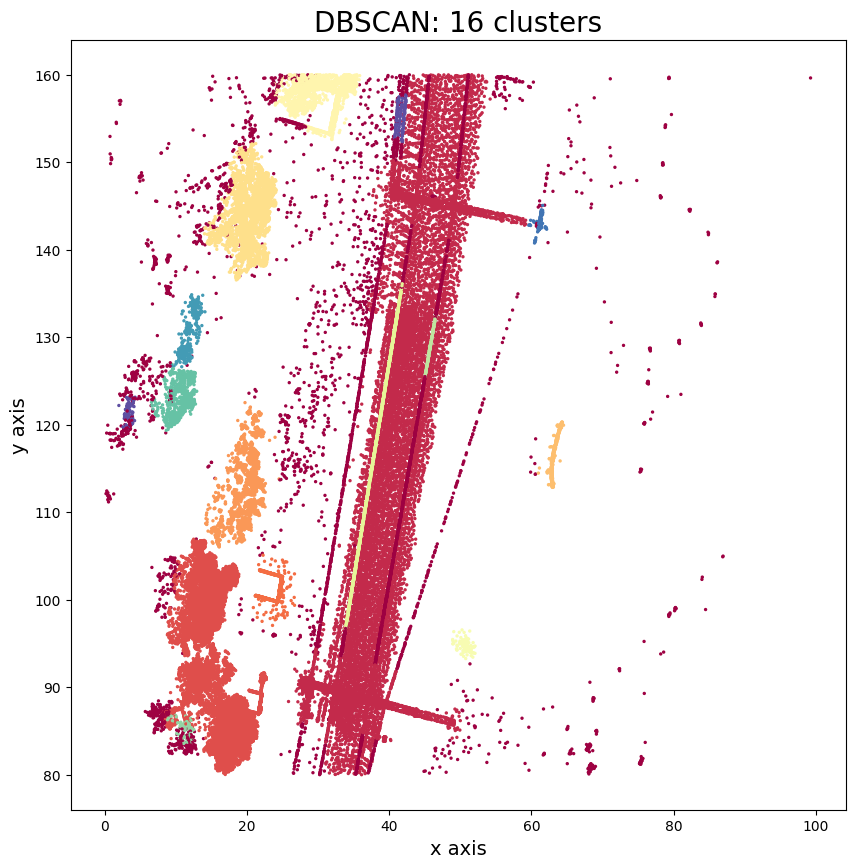

In [58]:
# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(pcd_above_ground[:,0], 
            pcd_above_ground[:,1],
            c=clustering.labels_,
            cmap=matplotlib.colors.ListedColormap(colors),
            s=2)


plt.title('DBSCAN: %d clusters' % clusters,fontsize=20)
plt.xlabel('x axis',fontsize=14)
plt.ylabel('y axis',fontsize=14)
plt.show()

# Dataset 2

In [59]:
pcd = np.load("./data/dataset2.npy")
pcd.shape

(84588, 3)

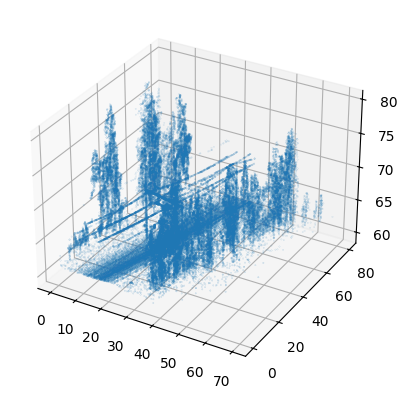

In [60]:
%matplotlib inline
show_cloud(pcd, "results/dataset_2_point_cloud.png")

Estimated ground level: 61.26545


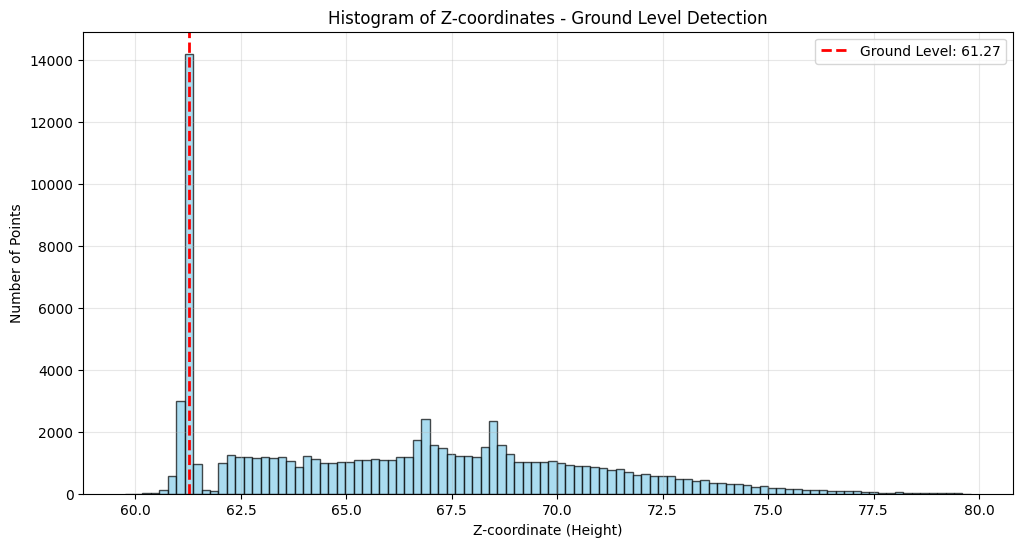

In [ ]:
def plot_histogram_ground_points(pcd):
    # Create histogram of z-coordinates
    z_coords = pcd[:, 2]
    hist, bin_edges = np.histogram(z_coords, bins=100)
    
    # Find the bin with the highest count (most common height)
    max_count_idx = np.argmax(hist)
    
    # Get the center of that bin as the ground level
    ground_level = (bin_edges[max_count_idx] + bin_edges[max_count_idx + 1]) / 2

    print(f"Estimated ground level: {ground_level}")

    z_coords = pcd[:, 2]
    plt.figure(figsize=(12, 6))
    plt.hist(z_coords, bins=100, alpha=0.7, color='skyblue', edgecolor='black')
    plt.axvline(x=ground_level, color='red', linestyle='--', linewidth=2, label=f'Ground Level: {ground_level:.2f}')
    plt.xlabel('Z-coordinate (Height)')
    plt.ylabel('Number of Points')
    plt.title('Histogram of Z-coordinates - Ground Level Detection')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig("results/dataset_2_histogram_ground.png", bbox_inches='tight')
    plt.show()

plot_histogram_ground_points(pcd)

In [62]:

'''
Task 1 (3)
find the best value for the ground level
One way to do it is useing a histogram 
np.histogram

update the function get_ground_level() with your changes

For both the datasets
Report the ground level in the readme file in your github project
Add the histogram plots to your project readme
'''
est_ground_level = get_ground_level(pcd)
print(est_ground_level)

pcd_above_ground = pcd[pcd[:,2] > est_ground_level] 

61.26545


In [63]:
pcd_above_ground.shape

(71858, 3)

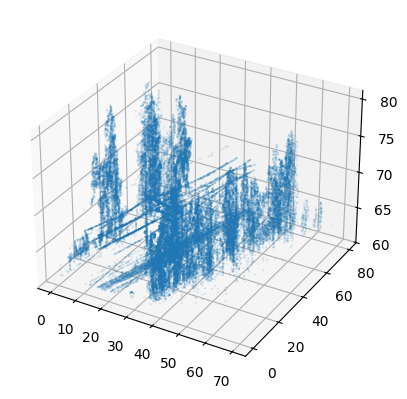

In [64]:
show_cloud(pcd_above_ground, "results/dataset_2_point_cloud_no_ground.png")

In [65]:
unoptimal_eps = 2
# find the elbow
clustering = DBSCAN(eps = unoptimal_eps, min_samples=100).fit(pcd_above_ground)

In [66]:
clusters = len(set(clustering.labels_)) - (1 if -1 in clustering.labels_ else 0)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, clusters)]

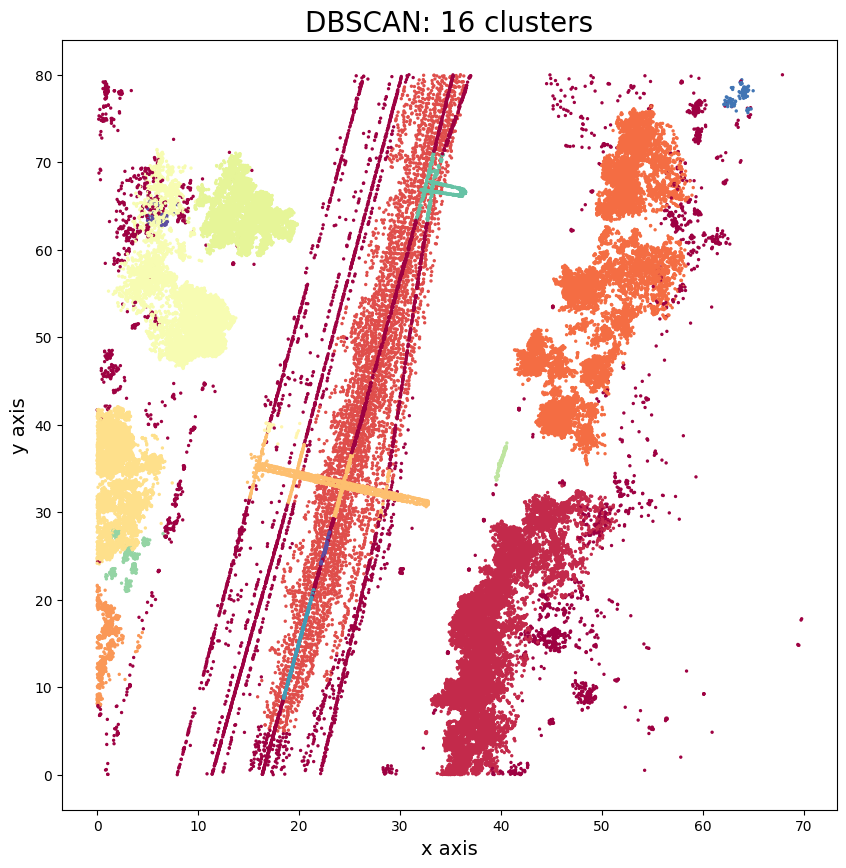

In [67]:
# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(pcd_above_ground[:,0], 
            pcd_above_ground[:,1],
            c=clustering.labels_,
            cmap=matplotlib.colors.ListedColormap(colors),
            s=2)


plt.title('DBSCAN: %d clusters' % clusters,fontsize=20)
plt.xlabel('x axis',fontsize=14)
plt.ylabel('y axis',fontsize=14)
plt.show()